<font size="6">**Project definition**</font>

This project aims to evaluate and demonstrate key performance metrics for classification problems, including precision, recall, F1 score, and ROC curve analysis. To achieve this, I will use the MNIST dataset, which will be split into a training set of 60,000 instances and a test set of 10,000 instances. I will then train a Random Forest classifier on the training data and assess its performance using the specified metrics on the test data.

<font size="5">**Import required libraries**</font>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

<font size="5">**Split the dataset into training and test set**</font>

In [20]:
# Step 1: Load MNIST dataset
mnist = fetch_openml('mnist_784', version = 1)
X = mnist['data']
y = mnist['target']

# Step 2: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 60000, test_size = 10000, random_state = 42)

<font size="5">**Fit a Random Forest classifier**</font>

In [30]:
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_clf.fit(X_train, y_train)
prediction = rf_clf.predict(X_test)

<font size="5">**Precision, Recall, and F1 Score**</font>

In multi-class classification, such as with the MNIST dataset, precision and recall are evaluated for each class separately. Then, they can be aggregated to get an overall view of the model's performance.

<font size="3">**Precision**</font>: It measures the accuracy of the positive predictions made for a specific class. It is the ratio of true positive predictions to the total number of instances predicted as positive for that class:

$Precision = \frac {TP}{TP+FP}$

<font size="3">**Recall or Sensitivity**</font>: It measures the ability of the classifier to find all relevant instances for a specific class. It is the ratio of true positive predictions to the total number of actual positive instances for that class:

$Recall = \frac {TP}{TP+FN}$

In this experiment, we calculate precision and recall for one class only (class of **2s**). 

<font size="3">**F1 Score**</font>: The F1 score is a metric that combines both precision and recall into a single number, providing a balanced measure of a model's performance, especially when dealing with imbalanced datasets. It is particularly useful when you need to balance the trade-off between precision and recall. It is the harmonic mean of precision and recall:

$F1 = \frac {2* (Precision * Recall)}{Precision+Recall}$


In [39]:
# seperate class=2 from the outputs
np.unique(y_test)
y_test_2 = y_test=='2'
y_train_2 = y_train=='2'
prediction_2 = prediction=='2'
precision = precision_score(y_test_2,prediction_2)
recall = recall_score(y_test_2,prediction_2)
f1 = f1_score(y_test_2,prediction_2)
print(f'Precision on test set : {precision:.3f}')
print(f'Recall on test set: {recall:.3f}')
print(f'F1 score on test set: {f1:.3f}')

Precision on test set : 0.943
Recall on test set: 0.973
F1 score on test set: 0.958


**The three metrics including Precision, Recall, and F1 score are fairly above 94%, which indicates that the classification model performed pretty well.**

<font size="5">**Visualizations**</font>

<font size="3">**ROC Curve**</font>: The ROC curve (Receiver Operating Characteristic curve) is a graphical representation used to evaluate the performance of a classification model, particularly in binary classification problems. It illustrates the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) at various threshold settings. The ROC curve is created by plotting the TPR against the FPR at different classification threshold values. By varying this threshold, you get different pairs of TPR and FPR. 

Each point on the ROC curve represents the TPR and FPR at a specific threshold. The curve starts at (0,0) and ends at (1,1). The shape of the curve shows the model’s performance across all thresholds.

**Area Under the ROC Curve (AUC-ROC):** The AUC-ROC is a single scalar value that summarizes the overall performance of the model. It shows the area under the ROC curve. An AUC of 0.5 indicates "random prediction", while an AUC of 1.0 indicates "perfect prediction".

In [51]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.legend()
    
def plot_precisions_recalls_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--", label = 'Precision')
    plt.plot(thresholds, recalls[:-1],"g--", label = 'Recall')
    plt.xlabel("Threshold")
    plt.legend()
    plt.show()

In order to plot the ROC curve, I need the score of all instances in the training set, and compute the precision and recall for all possible thresholds. For this purpose, I will use the cross_val_predict with method = 'predict_proba' which returns the probability of each class.

ROC-AUC is 0.998


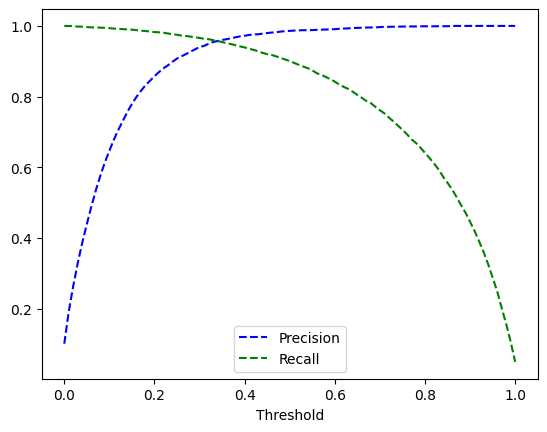

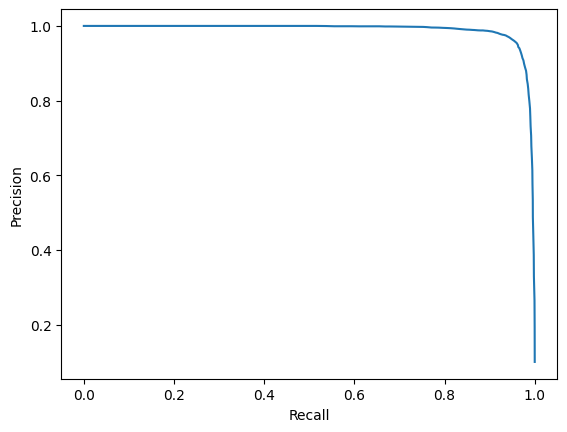

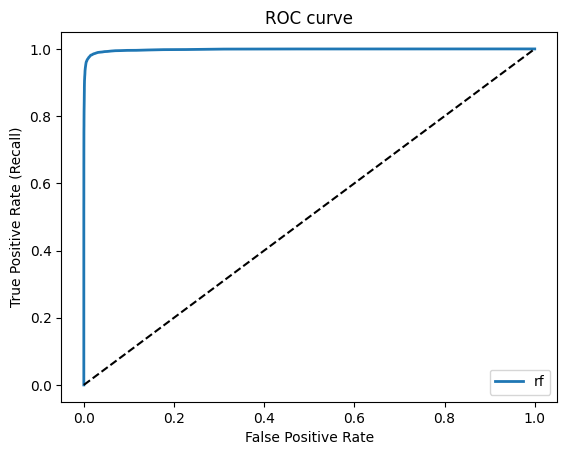

In [53]:
probs_rf_clf = cross_val_predict(rf_clf, X_train, y_train_2, cv=3, method= 'predict_proba')
probs_rf_clf_2 = probs_rf_clf[:,1]
roc_auc = roc_auc_score(y_train_2, probs_rf_clf_2)
print(f'ROC-AUC is {roc_auc:.3f}')

precisions, recalls, thresholds = precision_recall_curve(y_train_2, probs_rf_clf_2)
    
plot_precisions_recalls_vs_threshold(precisions, recalls, thresholds)

plt.plot(recalls, precisions, label = 'Precision-recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

fpr, tpr, thresholds = roc_curve(y_train_2, probs_rf_clf_2)
plot_roc_curve(fpr, tpr, label='rf')
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()